### Experementing with different models
Now that I have a reliable way to measure model accuracy, I can experiment with alternative models and see which gives the best predictions.

*I've build my model, and now it's time to optimize the size of the tree to make better predictions.*

In [6]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Path of the file to read
iowa_file_path = './data/home_data_for_machine_learning/train.csv'
home_data = pd.read_csv(iowa_file_path)

# Create target object and call it y
y = home_data.SalePrice
# Create X
feature_columns = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[feature_columns]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print(f"Validation MAE: {val_mae}")

print("First in-sample predictions:", iowa_model.predict(X.head()))
print("Actual target values for those homes:", y.head().tolist())

print('\nComplete')

Validation MAE: 29652.92876712329
First in-sample predictions: [208500. 181500. 223500. 128000. 250000.]
Actual target values for those homes: [208500, 181500, 223500, 140000, 250000]

Complete


### Exercises

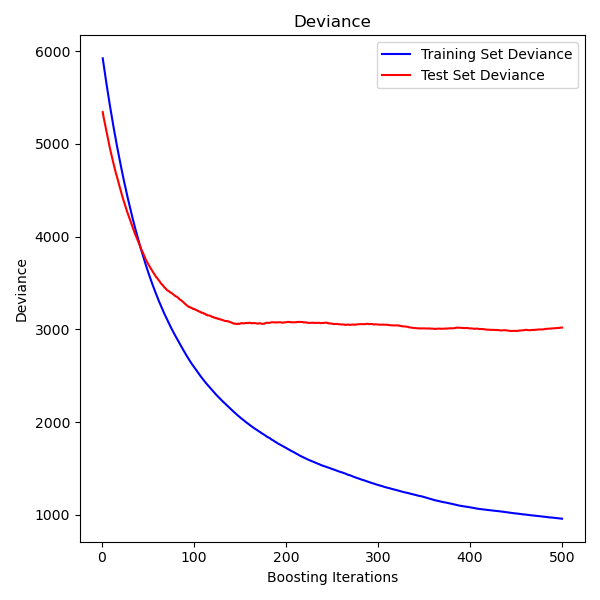
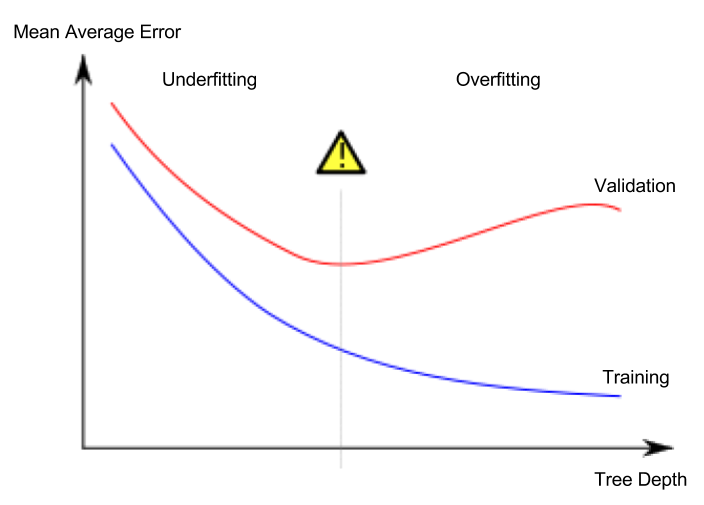

*I can control the tree size by specifying the number of leaf nodes via the parameter `max_leaf_nodes`.*

**Note**:  
The size of the model with the default parameters is $O(M * N * log(N))$, where $M$ is the number of trees and $N$ is the number of samples.  
In order to reduce the size of the model, you can change these parameters: `min_samples_split`, `max_leaf_nodes`, `max_depth` and `min_samples_leaf`.

In [7]:
# `MAE` is a function to help compare MAE scores from different values for max_leaf_nodes:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

### Step 1: Compare Different Tree Sizes

In [11]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes

# we nee two lists (`candidate_max_leaf_nodes`, `my_mae`) for to create a dictionary for that maked automatically output `ideal_tree_size`.
my_mae = []
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae.append(get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y))
    
# Creating a dictionary.
zipObj = dict(zip(candidate_max_leaf_nodes, my_mae))

# Found min `key` of values based on min `values` of value.
ideal_tree_size = min(zipObj, key = zipObj.get)

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = ideal_tree_size

print(best_tree_size)

100


### Step 2: Fit model using all data.
***ADVICE***: Now I know the best tree size.  
If you were going to deploy this model in practice, **you would make it even more accurate by using all of the data** and keeping that tree size.  
That is, you don't need to hold out the validation data now that you've made all your modeling decisions.

In [87]:
# help(DecisionTreeRegressor) # <<< max_leaf_nodes=None, random_state=None

# Fill in argument to make optimal size 
final_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state=1)

# Fit the final model.
final_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [85]:
new_forcast = final_model.predict(X)
print(list(new_forcast)[:10])
print(list(y)[:10])

[209133.65384615384, 146415.007518797, 209133.65384615384, 143297.46666666667, 270325.0, 142034.2105263158, 286617.28571428574, 179327.65, 132913.33333333334, 130629.0]
[208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000]


# Was be Earlier
```Python
[186500. 184000. 130000.  92000. 164500. 220000. 335000. 144152. 215000. 262000.]
```

In [89]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, new_forcast)

16629.181717827996